## iRONYUN Color Detection:
    Requirement: 1. More colour classes
                 2. Better Accuracy
    
        1. More colour class:
            - Currently:
                6 color: red, yellow, blue, green, white, black
                Approach: Define threshold(region) in HSV Color space.
                
        2. Better Accuracy:
            - Currently problems:
                1. car=black  : at day n night: windshield mislead false positive --> increase threshold
                2. car=yellow : 
                3. car=blue   : at       night: front lamp mislead false positive
                4. car=red    : at       night: rear lamp mislead false positive
                5. car=green  : at       night: complete mess up                  --> bad color range selected
                6. car=white  : at       night: front lamp mislead false positive
                7. ROI might mislead the detector.
                
            

In [44]:
# import the necessary packages
#import numpy as np
#import argparse
#import cv2
#from color_correction import *
import os

global_path = os.getcwd()
img_path    = global_path + '/img/'

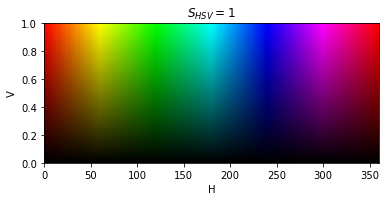

In [45]:
import numpy as np
import pylab as pl
from matplotlib.colors import hsv_to_rgb

V, H = np.mgrid[0:1:100j, 0:1:300j]
S = np.ones_like(V)
HSV = np.dstack((H,S,V))
RGB = hsv_to_rgb(HSV)
pl.imshow(RGB, origin="lower", extent=[0, 360, 0, 1], aspect=150)
pl.xlabel("H")
pl.ylabel("V")
pl.title("$S_{HSV}=1$")
pl.show()

## Current color range:

1. Green color range shift to blue. (can solve by re-config the range)

2. All the class contain too much low value point. (might mislead black detector)

## HSV space:
<img src="img/12.jpg" align="left"><img src="img/12.png" align="left" style ="margin-left:60px;margin-top:60px">

In [132]:
def inRange(img, lower_b, upper_b):
    ch1, ch2, ch3 = cv2.split(img)
    ch1m = (lower_b[0] <= ch1) & (ch1 <= upper_b[0])
    ch2m = (lower_b[1] <= ch2) & (ch2 <= upper_b[1])
    ch3m = (lower_b[2] <= ch3) & (ch3 <= upper_b[2])
    mask = ch1m & ch2m & ch3m
    return mask.astype(np.uint8)*255

In [54]:
import numpy as np 
import cv2
import pylab as pl
import time
%matplotlib inline

#lower_b = np.array([140, 60, 85])            #red
#upper_b = np.array([190, 255, 255])

#lower_b = np.array([37, 50, 85])             #green
#upper_b = np.array([85, 255, 255])

#lower_b = np.array([10, 50, 85])             #yellow
#upper_b = np.array([35, 255, 255])

#lower_b = np.array([85, 60, 85])             #blue
#upper_b = np.array([130, 255, 255]) 

#lower_b = np.array([140, 50, 85])            #red
#upper_b = np.array([190, 255, 255])


#lower_b = np.array([0, 0, 200])               #white
#upper_b = np.array([179, 10, 255])

#lower_b = np.array([0, 10, 200])               #white
#upper_b = np.array([179, 20, 255])

[ 71, 57, 99],[116, 255, 255]
# detect black
lower_b = np.array([ 71, 57, 99])                   #black
upper_b= np.array([116, 255, 255])
        
#lower_b = np.array([0,30,0])                   #black
#upper_b = np.array([179,255,60])


s_gradient = np.ones((500,1), dtype=np.uint8)*np.linspace(lower_b[1], upper_b[1], 500, dtype=np.uint8)
v_gradient = np.rot90(np.ones((500,1), dtype=np.uint8)*np.linspace(lower_b[2], upper_b[2], 500, dtype=np.uint8))
h_array = np.arange(lower_b[0], upper_b[0]+1)

for hue in h_array:
    h = hue*np.ones((500,500), dtype=np.uint8)
    hsv_color = cv2.merge((h, s_gradient, v_gradient))
    rgb_color = cv2.cvtColor(hsv_color, cv2.COLOR_HSV2BGR)
    cv2.imshow('', rgb_color)
    cv2.waitKey(140)

cv2.destroyAllWindows()

## Old Algorithms:

<img src="img/13.png" align="left" style="margin-left:-10px;margin-top:10px;height:350px">

In [224]:
import sys
import cv2
import numpy as np

#  Log system        
class PS_Search_Color:

    def color_detection(self, frame_in):
        # Take each frame
        #frame = cv2.imread(image_name)
        src_height, src_width, src_channels = frame_in.shape
        roiX = int(src_width / 4)
        roiWidth = roiX * 2
        roiY = src_height / 4
        roiHeight = roiY * 2
        frame = frame_in[roiY : roiY+roiHeight, roiX : roiX+roiWidth]
        
        src_height, src_width, src_channels = frame.shape
        max_value = src_height * src_width * 255

        # Convert BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # detect red
        lower = np.array([150, 30, 30])
        upper = np.array([190, 255, 255])
        mask1 = cv2.inRange(hsv, lower, upper)
        lower = np.array([0, 30, 30])
        upper = np.array([10, 255, 255])
        mask2 = cv2.inRange(hsv, lower, upper)
        mask = mask1 + mask2
        redVal = float(mask.sum()) / float(max_value)
        if redVal > 0.4:
            red=round(redVal,2)
        else:
            red=round(redVal,2)

        # detect yellow
        lower = np.array([5, 100, 100])
        upper = np.array([40, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
        yellowVal = float(mask.sum()) / float(max_value)
        if yellowVal > 0.15:
            yellow=round(yellowVal,2)
        else:
            yellow=round(yellowVal,2)

        # detect blue
        lower = np.array([100, 60, 60])
        upper = np.array([140, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
        blueVal = float(mask.sum()) / float(max_value)
        if blueVal > 0.5:
            blue=round(blueVal,2)
        else:
            blue=round(blueVal,2)

        # detect green (gray)
        lower_green = np.array([103, 86, 65])
        upper_green = np.array([145, 133, 128])
        mask = cv2.inRange(hsv, lower_green, upper_green)
        greenVal = float(mask.sum()) / float(max_value)
        if greenVal > 0.01:
            green=round(greenVal,2)
        else:
            green=round(greenVal,2)

        # detect white
        lower = np.array([0, 0, 140])
        upper = np.array([256, 60, 256])
        mask = cv2.inRange(hsv, lower, upper)
        whiteVal = float(mask.sum()) / float(max_value)
        if whiteVal > 0.5:
            white=round(whiteVal,2)
        else:
            white=round(whiteVal,2)

        # detect black
        lower_black = np.array([110,50,50])
        upper_black= np.array([130,255,255])
        mask = cv2.inRange(hsv, lower_black, upper_black)
        blackVal = float(mask.sum()) / float(max_value)
        if blackVal > 0.15:
            black=round(blackVal,2)
        else:
            black=round(blackVal,2)

        return red, yellow, blue, green, white, black



In [46]:

color_boundaries_bank = {
    'red': ([140, 30, 60],[190, 255, 255]),
    'yellow': ([ 10, 30, 60],[ 37, 255, 255]),
    'blue':([ 85, 30, 60],[140, 255, 255]),
    'green':([ 37, 30, 60],[ 85, 255, 255]),
    'white':([  0,  0,200],[179,  10, 255],[ 0, 10,200],[179, 25,255]),
    'black':([  0,  0,  0],[179,  30, 160],[ 0, 30,  0],[179,255, 60])
}
# define base threshold, default 0.3
color_baseThreshold = {
    'red': 0.3,
    'yellow': 0.3,
    'blue':0.3,
    'green':0.3,
    'white':0.3,
    'black':0.3
}

import sys
import cv2
import numpy as np

#  Log system        
class DL_Search_Color:

    def color_detection(self, frame_in):
        
        color_to_be_detected = ['red','yellow','blue','green','white','black']
        # Take each frame
        #frame = cv2.imread(image_name)
        src_height, src_width, src_channels = frame_in.shape
        roiX = int(src_width / 4)
        roiWidth = roiX * 2
        roiY = src_height / 4
        roiHeight = roiY * 2
        frame = frame_in[roiY : roiY+roiHeight, roiX : roiX+roiWidth]
        
        src_height, src_width, src_channels = frame.shape
        max_value = src_height * src_width * 255
        
        src_height, src_width, src_channels = frame.shape
        max_value = src_height * src_width * 255

        # Convert BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        res = [False] * len(color_to_be_detected)
        for idx,color in enumerate(color_to_be_detected):
            color_boundaries = color_boundaries_bank[color]
            assert len(color_boundaries) % 2 == 0, "Each boundary must have a lower/upper pair"

            mask = 0
            #loop over each boundary pair for this color
            for lower,upper in zip(color_boundaries[0::2], color_boundaries[1::2]):
                mask = mask + cv2.inRange(hsv, np.array(lower), np.array(upper))
                Val = float(mask.sum()) / float(max_value)
                #if Val > color_baseThreshold[color]:
                    
                res[idx] = round(Val,2)

        
        

        # detect red
        #lower = np.array([150, 30, 30])
        #upper = np.array([190, 255, 255])
        #mask1 = cv2.inRange(hsv, lower, upper)
        lower_red = np.array([140, 30, 60])            #red
        upper_red = np.array([190, 255, 255])
        mask = cv2.inRange(hsv, lower_red, upper_red)
        redVal = float(mask.sum()) / float(max_value)
        if redVal > 0.4:
            red=round(redVal,2)
        else:
            red=round(redVal,2)

        # detect yellow
        lower_yellow = np.array([10, 30, 60])             #yellow
        upper_yellow = np.array([37, 255, 255])
        mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
        yellowVal = float(mask.sum()) / float(max_value)
        if yellowVal > 0.15:
            yellow=round(yellowVal,2)
        else:
            yellow=round(yellowVal,2)

        # detect blue
        lower_blue = np.array([85, 30, 60])             #blue
        upper_blue = np.array([140, 255, 255])   
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        blueVal = float(mask.sum()) / float(max_value)
        if blueVal > 0.5:
            blue=round(blueVal,2)
        else:
            blue=round(blueVal,2)

        # detect green (gray)
        lower_green = np.array([37, 30, 60])             #green
        upper_green = np.array([85, 255, 255])
        mask = cv2.inRange(hsv, lower_green, upper_green)
        greenVal = float(mask.sum()) / float(max_value)
        if greenVal > 0.01:
            green=round(greenVal,2)
        else:
            green=round(greenVal,2)

        # detect white
        lower_white = np.array([0, 0, 200])               #white
        upper_white = np.array([179, 10, 255])
        mask1 = cv2.inRange(hsv, lower_white, upper_white)
        lower_white = np.array([0, 10, 200])               #white
        upper_white = np.array([179, 25, 255])
        mask2 = cv2.inRange(hsv, lower_white, upper_white)
        mask = mask1 + mask2
        whiteVal = float(mask.sum()) / float(max_value)
        if whiteVal > 0.3:
            white=round(whiteVal,2)
        else:
            white=round(whiteVal,2)

        # detect black
        lower_b = np.array([0,0,0])                   #black
        upper_b= np.array([179,30,120])
        mask1 = cv2.inRange(hsv, lower_b, upper_b)
        lower_black = np.array([0,30,0])                   #black
        upper_black = np.array([179,255,60])
        mask2 = cv2.inRange(hsv, lower_black, upper_black)
        mask = mask1 + mask2
        redVal = float(mask.sum()) / float(max_value)
        blackVal = float(mask.sum()) / float(max_value)
        if blackVal > 0.01:
            black=round(blackVal,2)
        else:
            black=round(blackVal,2)
        """"""
        print red, yellow, blue, green, white, black
        print res

        return red, yellow, blue, green, white, black

#search_color = DL_Search_Color()
#img = cv2.imread('2.jpg')
#search_color.color_detection(img)

In [47]:
search_color = DL_Search_Color()
#img = cv2.imread('2.jpg')
#search_color.color_detection(origin_img)

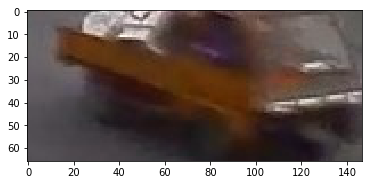

red yellow blue green white black
0.02 0.0 0.73 0.0 0.0 0.26
[0.02, 0.0, 0.73, 0.0, 0.0, 0.26]
(0.02, 0.0, 0.73, 0.0, 0.0, 0.26)


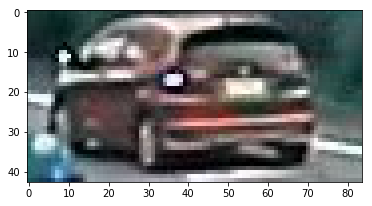

red yellow blue green white black
0.01 0.0 0.55 0.02 0.06 0.25
[0.01, 0.0, 0.55, 0.02, 0.06, 0.32]
(0.01, 0.0, 0.55, 0.02, 0.06, 0.25)


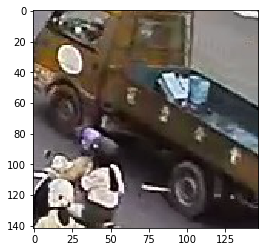

red yellow blue green white black
0.02 0.09 0.35 0.0 0.01 0.5
[0.02, 0.09, 0.35, 0.0, 0.01, 0.52]
(0.02, 0.09, 0.35, 0.0, 0.01, 0.5)


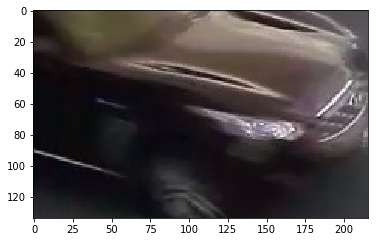

red yellow blue green white black
0.02 0.0 0.3 0.0 0.01 0.64
[0.02, 0.0, 0.3, 0.0, 0.01, 0.67]
(0.02, 0.0, 0.3, 0.0, 0.01, 0.64)


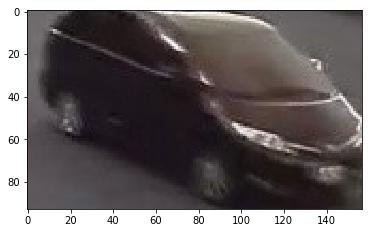

red yellow blue green white black
0.01 0.0 0.32 0.0 0.01 0.64
[0.01, 0.0, 0.32, 0.0, 0.01, 0.65]
(0.01, 0.0, 0.32, 0.0, 0.01, 0.64)


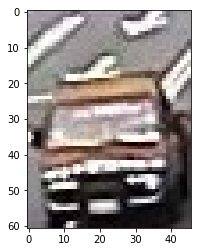

red yellow blue green white black
0.0 0.0 0.55 0.0 0.21 0.04
[0.0, 0.0, 0.55, 0.0, 0.21, 0.08]
(0.0, 0.0, 0.55, 0.0, 0.21, 0.04)


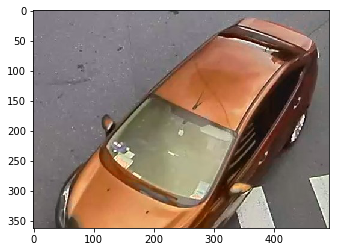

red yellow blue green white black
0.0 0.0 0.81 0.0 0.0 0.09
[0.0, 0.0, 0.81, 0.0, 0.0, 0.19]
(0.0, 0.0, 0.81, 0.0, 0.0, 0.09)


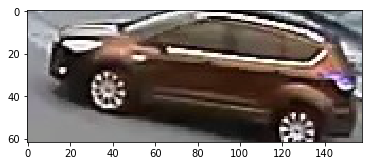

red yellow blue green white black
0.0 0.0 0.55 0.0 0.03 0.43
[0.0, 0.0, 0.55, 0.0, 0.03, 0.43]
(0.0, 0.0, 0.55, 0.0, 0.03, 0.43)


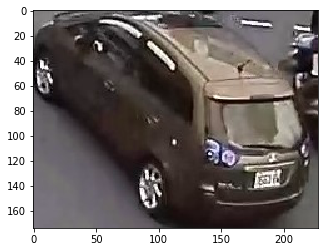

red yellow blue green white black
0.03 0.0 0.45 0.0 0.01 0.51
[0.03, 0.0, 0.45, 0.0, 0.01, 0.52]
(0.03, 0.0, 0.45, 0.0, 0.01, 0.51)


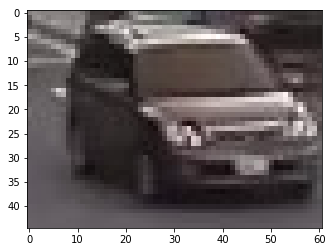

red yellow blue green white black
0.0 0.0 0.44 0.0 0.02 0.47
[0.0, 0.0, 0.44, 0.0, 0.02, 0.52]
(0.0, 0.0, 0.44, 0.0, 0.02, 0.47)


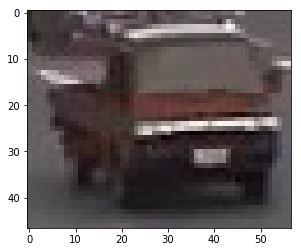

red yellow blue green white black
0.0 0.0 0.59 0.0 0.03 0.34
[0.0, 0.0, 0.59, 0.0, 0.03, 0.38]
(0.0, 0.0, 0.59, 0.0, 0.03, 0.34)


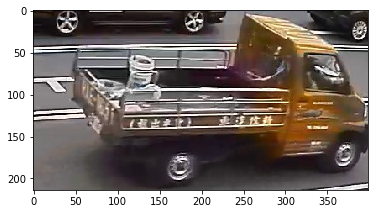

red yellow blue green white black
0.0 0.0 0.36 0.0 0.11 0.37
[0.0, 0.0, 0.36, 0.0, 0.11, 0.47]
(0.0, 0.0, 0.36, 0.0, 0.11, 0.37)


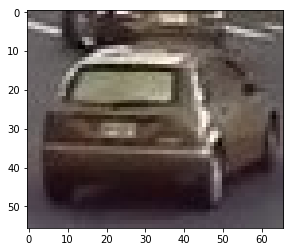

red yellow blue green white black
0.0 0.0 0.8 0.0 0.02 0.17
[0.0, 0.0, 0.8, 0.0, 0.02, 0.17]
(0.0, 0.0, 0.8, 0.0, 0.02, 0.17)


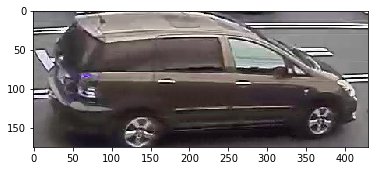

red yellow blue green white black
0.0 0.0 0.54 0.0 0.02 0.34
[0.0, 0.0, 0.54, 0.0, 0.02, 0.37]
(0.0, 0.0, 0.54, 0.0, 0.02, 0.34)


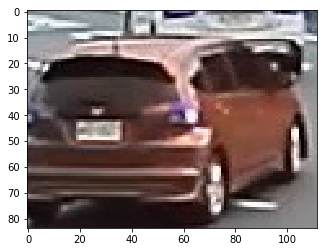

red yellow blue green white black
0.03 0.0 0.82 0.0 0.02 0.13
[0.03, 0.0, 0.82, 0.0, 0.02, 0.13]
(0.03, 0.0, 0.82, 0.0, 0.02, 0.13)


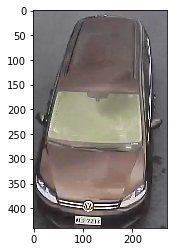

red yellow blue green white black
0.0 0.0 0.97 0.0 0.0 0.01
[0.0, 0.0, 0.97, 0.0, 0.0, 0.03]
(0.0, 0.0, 0.97, 0.0, 0.0, 0.01)


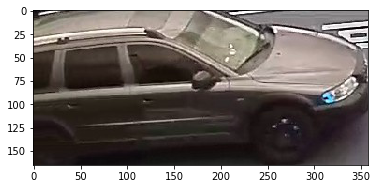

red yellow blue green white black
0.0 0.0 0.39 0.0 0.03 0.5
[0.0, 0.0, 0.39, 0.0, 0.03, 0.52]
(0.0, 0.0, 0.39, 0.0, 0.03, 0.5)


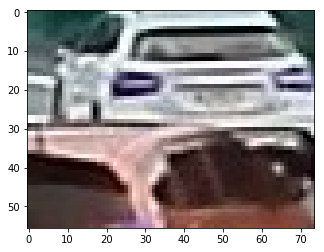

red yellow blue green white black
0.04 0.0 0.27 0.0 0.28 0.17
[0.04, 0.0, 0.27, 0.0, 0.28, 0.23]
(0.04, 0.0, 0.27, 0.0, 0.28, 0.17)


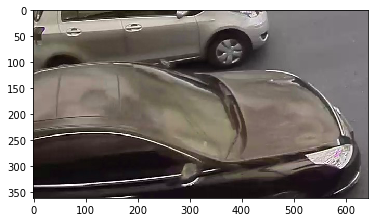

red yellow blue green white black
0.0 0.0 0.77 0.0 0.01 0.18
[0.0, 0.0, 0.77, 0.0, 0.01, 0.23]
(0.0, 0.0, 0.77, 0.0, 0.01, 0.18)


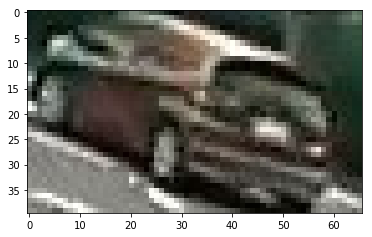

red yellow blue green white black
0.0 0.0 0.53 0.05 0.0 0.39
[0.0, 0.0, 0.53, 0.05, 0.0, 0.45]
(0.0, 0.0, 0.53, 0.05, 0.0, 0.39)


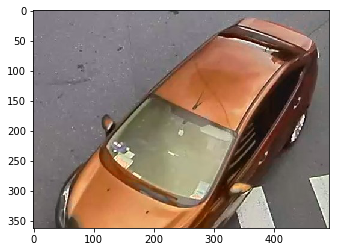

red yellow blue green white black
0.0 0.0 0.81 0.0 0.0 0.09
[0.0, 0.0, 0.81, 0.0, 0.0, 0.19]
(0.0, 0.0, 0.81, 0.0, 0.0, 0.09)


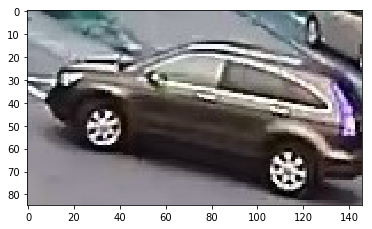

red yellow blue green white black
0.0 0.0 0.24 0.01 0.09 0.47
[0.0, 0.0, 0.24, 0.01, 0.09, 0.57]
(0.0, 0.0, 0.24, 0.01, 0.09, 0.47)


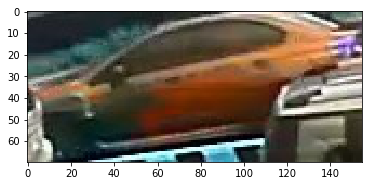

red yellow blue green white black
0.0 0.01 0.83 0.02 0.0 0.15
[0.0, 0.01, 0.83, 0.02, 0.0, 0.16]
(0.0, 0.01, 0.83, 0.02, 0.0, 0.15)


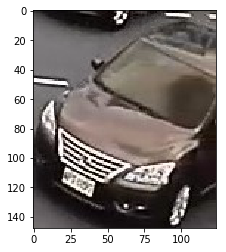

red yellow blue green white black
0.0 0.0 0.75 0.0 0.07 0.08
[0.0, 0.0, 0.75, 0.0, 0.07, 0.16]
(0.0, 0.0, 0.75, 0.0, 0.07, 0.08)


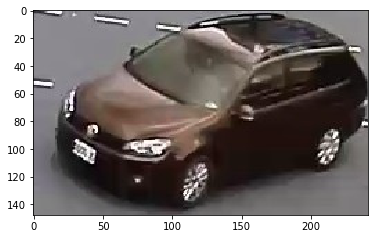

red yellow blue green white black
0.0 0.0 0.63 0.01 0.02 0.31
[0.0, 0.0, 0.63, 0.01, 0.02, 0.34]
(0.0, 0.0, 0.63, 0.01, 0.02, 0.31)


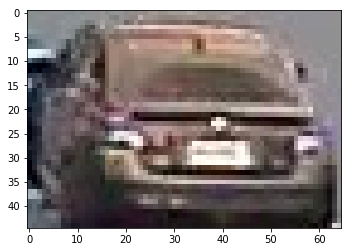

red yellow blue green white black
0.01 0.0 0.78 0.0 0.09 0.08
[0.01, 0.0, 0.78, 0.0, 0.09, 0.1]
(0.01, 0.0, 0.78, 0.0, 0.09, 0.08)


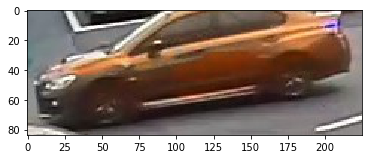

red yellow blue green white black
0.0 0.0 0.89 0.0 0.0 0.11
[0.0, 0.0, 0.89, 0.0, 0.0, 0.11]
(0.0, 0.0, 0.89, 0.0, 0.0, 0.11)


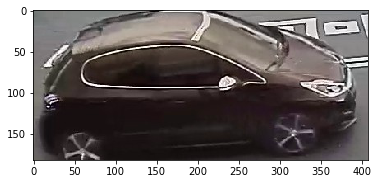

red yellow blue green white black
0.0 0.0 0.27 0.0 0.03 0.69
[0.0, 0.0, 0.27, 0.0, 0.03, 0.7]
(0.0, 0.0, 0.27, 0.0, 0.03, 0.69)


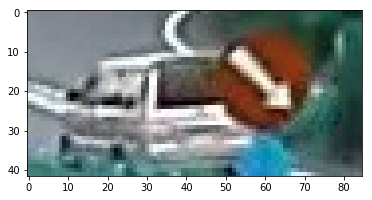

red yellow blue green white black
0.0 0.0 0.41 0.0 0.2 0.19
[0.0, 0.0, 0.41, 0.0, 0.2, 0.27]
(0.0, 0.0, 0.41, 0.0, 0.2, 0.19)


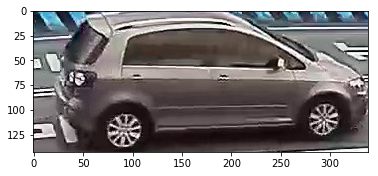

red yellow blue green white black
0.0 0.0 0.7 0.0 0.03 0.12
[0.0, 0.0, 0.7, 0.0, 0.03, 0.16]
(0.0, 0.0, 0.7, 0.0, 0.03, 0.12)


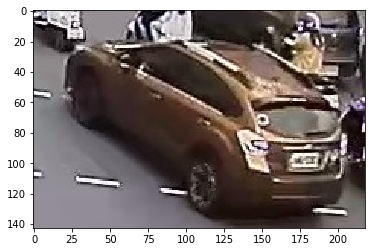

red yellow blue green white black
0.0 0.0 0.53 0.0 0.02 0.46
[0.0, 0.0, 0.53, 0.0, 0.02, 0.46]
(0.0, 0.0, 0.53, 0.0, 0.02, 0.46)


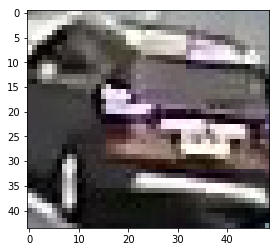

red yellow blue green white black
0.1 0.0 0.23 0.0 0.09 0.5
[0.1, 0.0, 0.23, 0.0, 0.09, 0.55]
(0.1, 0.0, 0.23, 0.0, 0.09, 0.5)


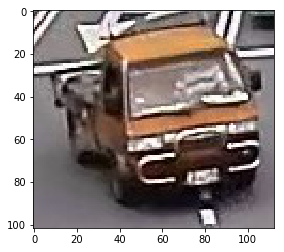

red yellow blue green white black
0.0 0.0 0.59 0.0 0.08 0.22
[0.0, 0.0, 0.59, 0.0, 0.08, 0.26]
(0.0, 0.0, 0.59, 0.0, 0.08, 0.22)


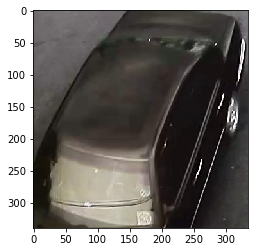

red yellow blue green white black
0.0 0.0 0.41 0.0 0.0 0.6
[0.0, 0.0, 0.41, 0.0, 0.0, 0.61]
(0.0, 0.0, 0.41, 0.0, 0.0, 0.6)


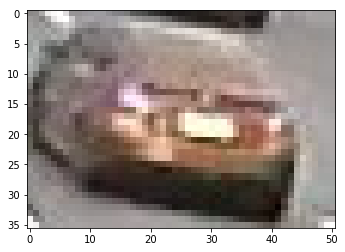

red yellow blue green white black
0.0 0.0 0.95 0.0 0.02 0.03
[0.0, 0.0, 0.95, 0.0, 0.02, 0.03]
(0.0, 0.0, 0.95, 0.0, 0.02, 0.03)


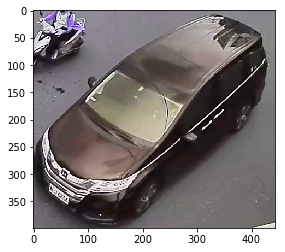

red yellow blue green white black
0.0 0.0 0.66 0.0 0.02 0.29
[0.0, 0.0, 0.66, 0.0, 0.02, 0.31]
(0.0, 0.0, 0.66, 0.0, 0.02, 0.29)


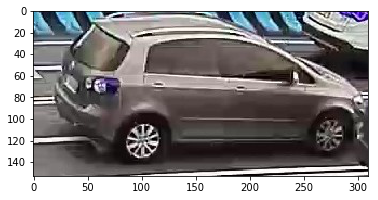

red yellow blue green white black
0.0 0.0 0.6 0.0 0.04 0.19
[0.0, 0.0, 0.6, 0.0, 0.04, 0.24]
(0.0, 0.0, 0.6, 0.0, 0.04, 0.19)


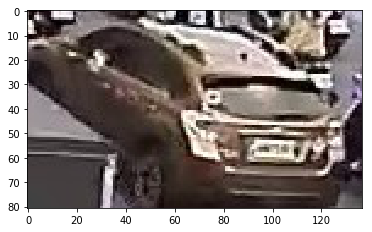

red yellow blue green white black
0.0 0.0 0.62 0.0 0.08 0.26
[0.0, 0.0, 0.62, 0.0, 0.08, 0.27]
(0.0, 0.0, 0.62, 0.0, 0.08, 0.26)


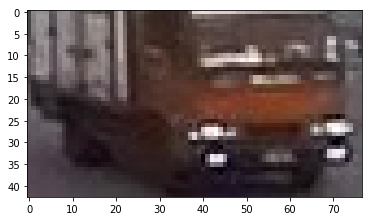

red yellow blue green white black
0.0 0.0 0.76 0.0 0.03 0.19
[0.0, 0.0, 0.76, 0.0, 0.03, 0.21]
(0.0, 0.0, 0.76, 0.0, 0.03, 0.19)


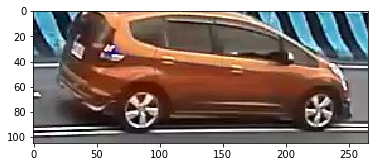

red yellow blue green white black
0.0 0.0 0.96 0.0 0.0 0.04
[0.0, 0.0, 0.96, 0.0, 0.0, 0.04]
(0.0, 0.0, 0.96, 0.0, 0.0, 0.04)


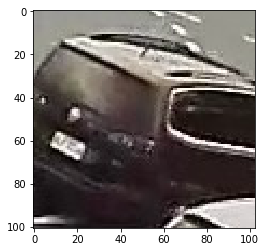

red yellow blue green white black
0.0 0.0 0.5 0.0 0.05 0.43
[0.0, 0.0, 0.5, 0.0, 0.05, 0.44]
(0.0, 0.0, 0.5, 0.0, 0.05, 0.43)


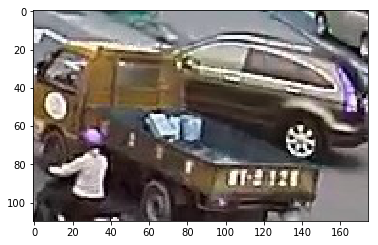

red yellow blue green white black
0.01 0.14 0.44 0.0 0.03 0.3
[0.01, 0.14, 0.44, 0.0, 0.03, 0.33]
(0.01, 0.14, 0.44, 0.0, 0.03, 0.3)


In [52]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
import sys, os
import time
#search_color = PS_Search_Color()
DL_search_color = DL_Search_Color()
target_folder = 'day/black/'
for file in os.listdir(img_path + target_folder): 
    if(file != os.path.basename("__file__")):
        if(file[-3:] == 'jpg'):
            
            origin_img = cv2.imread(img_path + target_folder + file)
            plt.figure()
            plt.imshow(origin_img)
            


            plt.show()
            print('red yellow blue green white black')
            #print(search_color.color_detection(origin_img))
            print(DL_search_color.color_detection(origin_img))

## White Balance Algorithms (Normalization):
<img src="img/10.jpg" align="left" style="margin-left:0px;margin-top:10px">

In [ ]:
#white balance
import numpy as np
from PIL import Image
import sys

def from_pil(pimg):
    pimg = pimg.convert(mode='RGB')
    nimg = np.asarray(pimg)
    nimg.flags.writeable = True
    return nimg

def to_pil(nimg):

    #return Image.fromarray(np.uint8(nimg))
    rgb_nimg = Image.fromarray(np.uint8(nimg)).convert('RGB')
    opencv_img = np.array(rgb_nimg)
    # Convert RGB to BGR
    opencv_img = opencv_img[:, :, ::-1].copy()
    return opencv_img

def retinex(nimg):
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)
    mu_g = nimg[1].max()
    nimg[0] = np.minimum(nimg[0]*(mu_g/float(nimg[0].max())),255)
    nimg[2] = np.minimum(nimg[2]*(mu_g/float(nimg[2].max())),255)
    return nimg.transpose(1, 2, 0).astype(np.uint8)

def retinex_adjust(nimg):
    """
    from 'Combining Gray World and Retinex Theory for Automatic White Balance in Digital Photography'
    """
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)
    sum_r = np.sum(nimg[0])
    sum_r2 = np.sum(nimg[0]**2)
    max_r = nimg[0].max()
    max_r2 = max_r**2
    sum_g = np.sum(nimg[1])
    max_g = nimg[1].max()
    coefficient = np.linalg.solve(np.array([[sum_r2,sum_r],[max_r2,max_r]]),
                                  np.array([sum_g,max_g]))

    nimg[0] = np.minimum((nimg[0]**2)*coefficient[0] + nimg[0]*coefficient[1],255)
    sum_b = np.sum(nimg[1])
    sum_b2 = np.sum(nimg[1]**2)
    max_b = nimg[1].max()
    max_b2 = max_r**2
    coefficient = np.linalg.solve(np.array([[sum_b2,sum_b],[max_b2,max_b]]),
                                             np.array([sum_g,max_g]))
    nimg[1] = np.minimum((nimg[1]**2)*coefficient[0] + nimg[1]*coefficient[1],255)
    return nimg.transpose(1, 2, 0).astype(np.uint8)


## Experiment: effect of applying white balance to original algorithms: 

1. All the class increase accuracy. especially red color ---> false positive rate drop alot.

---> solve rear light noise problem.
2. White color class false positive still high.

---> need solution to filter out the light.

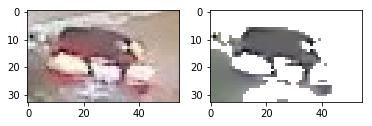

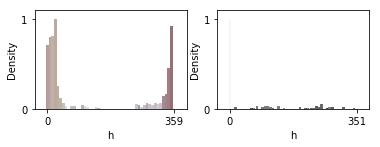

          red    yellow    blue    green   white  black
original:(0.55, 0.0, 0.0, 0.0, 0.59, 0.0)
whitebal:(0.01, 0.0, 0.0, 0.0, 0.57, 0.0)






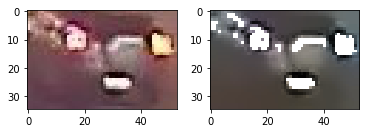

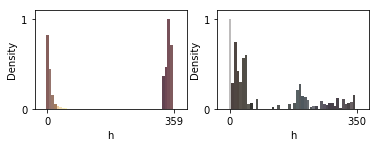

          red    yellow    blue    green   white  black
original:(0.9, 0.01, 0.0, 0.0, 0.2, 0.0)
whitebal:(0.05, 0.0, 0.0, 0.0, 0.17, 0.0)






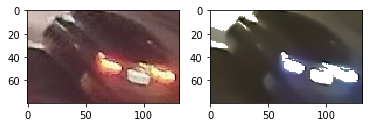

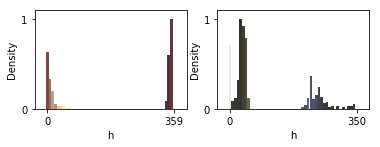

          red    yellow    blue    green   white  black
original:(0.91, 0.06, 0.0, 0.0, 0.05, 0.0)
whitebal:(0.2, 0.0, 0.05, 0.0, 0.1, 0.01)






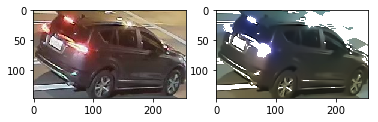

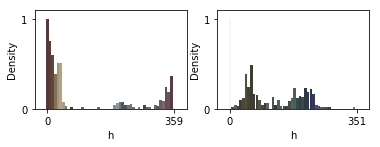

          red    yellow    blue    green   white  black
original:(0.67, 0.03, 0.0, 0.0, 0.1, 0.0)
whitebal:(0.18, 0.01, 0.01, 0.0, 0.15, 0.0)






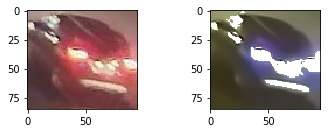

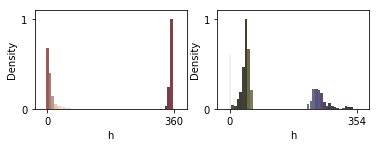

          red    yellow    blue    green   white  black
original:(0.91, 0.03, 0.0, 0.0, 0.09, 0.0)
whitebal:(0.31, 0.0, 0.02, 0.0, 0.18, 0.0)






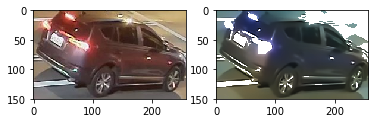

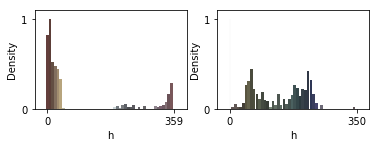

          red    yellow    blue    green   white  black
original:(0.73, 0.03, 0.0, 0.0, 0.1, 0.0)
whitebal:(0.19, 0.01, 0.0, 0.0, 0.13, 0.0)






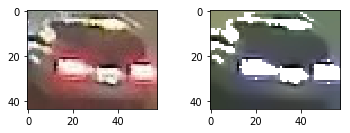

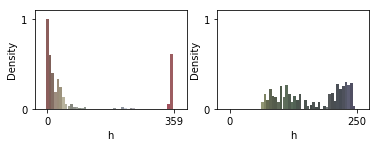

          red    yellow    blue    green   white  black
original:(0.68, 0.05, 0.0, 0.0, 0.25, 0.0)
whitebal:(0.24, 0.0, 0.0, 0.0, 0.29, 0.0)






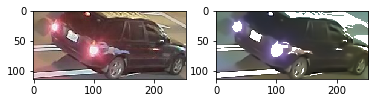

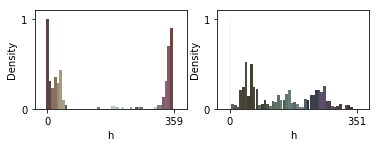

          red    yellow    blue    green   white  black
original:(0.83, 0.0, 0.0, 0.0, 0.09, 0.0)
whitebal:(0.28, 0.0, 0.0, 0.0, 0.12, 0.0)






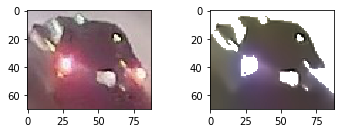

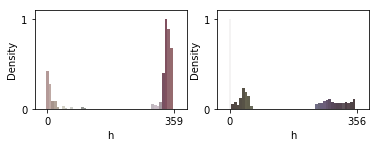

          red    yellow    blue    green   white  black
original:(0.83, 0.0, 0.0, 0.0, 0.18, 0.0)
whitebal:(0.23, 0.0, 0.07, 0.0, 0.19, 0.04)






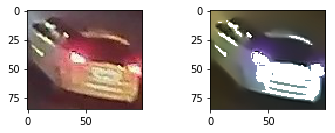

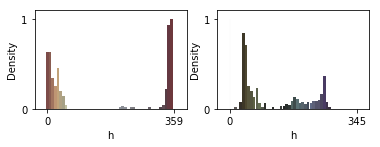

          red    yellow    blue    green   white  black
original:(0.7, 0.16, 0.0, 0.0, 0.08, 0.0)
whitebal:(0.24, 0.0, 0.01, 0.0, 0.3, 0.0)






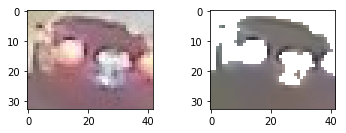

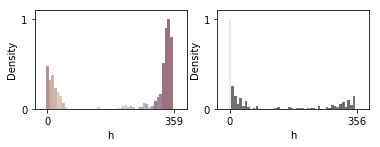

          red    yellow    blue    green   white  black
original:(0.79, 0.0, 0.0, 0.0, 0.44, 0.0)
whitebal:(0.0, 0.0, 0.0, 0.0, 0.41, 0.0)






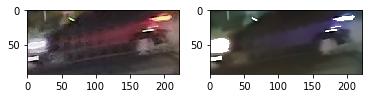

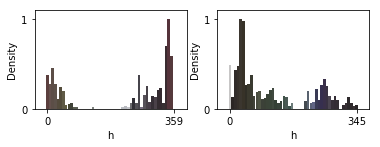

          red    yellow    blue    green   white  black
original:(0.68, 0.0, 0.0, 0.0, 0.02, 0.0)
whitebal:(0.26, 0.0, 0.04, 0.0, 0.03, 0.01)






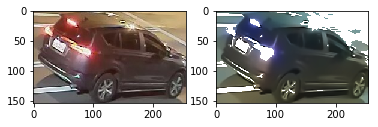

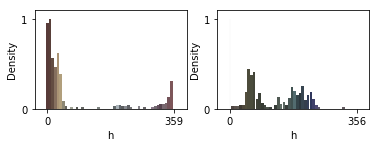

          red    yellow    blue    green   white  black
original:(0.7, 0.06, 0.0, 0.0, 0.1, 0.0)
whitebal:(0.15, 0.01, 0.01, 0.0, 0.16, 0.0)






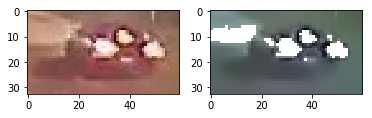

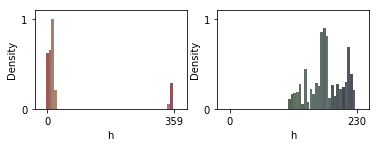

          red    yellow    blue    green   white  black
original:(0.87, 0.14, 0.0, 0.0, 0.07, 0.0)
whitebal:(0.11, 0.0, 0.0, 0.0, 0.23, 0.0)






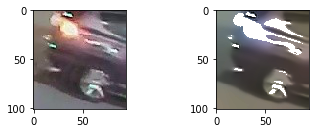

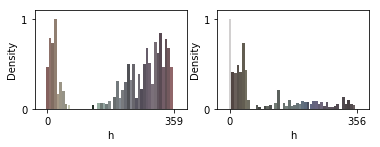

          red    yellow    blue    green   white  black
original:(0.51, 0.03, 0.0, 0.0, 0.21, 0.0)
whitebal:(0.11, 0.0, 0.0, 0.0, 0.27, 0.03)






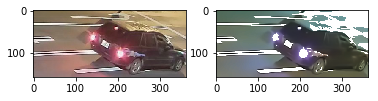

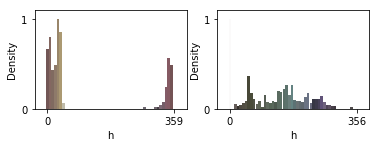

          red    yellow    blue    green   white  black
original:(0.58, 0.04, 0.0, 0.0, 0.1, 0.0)
whitebal:(0.23, 0.0, 0.0, 0.0, 0.21, 0.0)






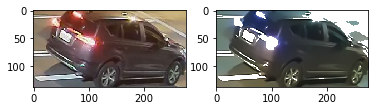

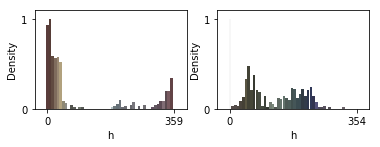

          red    yellow    blue    green   white  black
original:(0.69, 0.04, 0.0, 0.0, 0.11, 0.0)
whitebal:(0.19, 0.01, 0.01, 0.0, 0.13, 0.0)






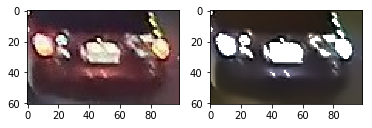

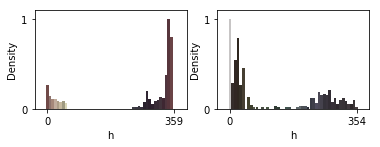

          red    yellow    blue    green   white  black
original:(0.78, 0.01, 0.0, 0.0, 0.16, 0.0)
whitebal:(0.24, 0.0, 0.0, 0.0, 0.18, 0.02)






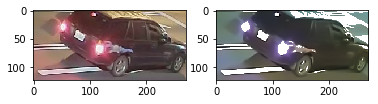

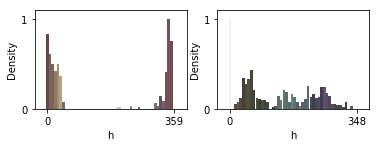

          red    yellow    blue    green   white  black
original:(0.79, 0.01, 0.0, 0.0, 0.1, 0.0)
whitebal:(0.26, 0.0, 0.01, 0.0, 0.15, 0.0)






In [28]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
import sys, os
import time
from color_histogram.io_util.image import loadRGB
from color_histogram.core.hist_1d import Hist1D
from color_histogram.core.hist_2d import Hist2D
from color_histogram.core.hist_3d import Hist3D
from mpl_toolkits.mplot3d import Axes3D
from color_histogram.cv.image import *


%matplotlib inline

target_folder = 'night/red/'
for file in os.listdir(img_path + target_folder):
    if(file != os.path.basename("__file__")):
        if(file[-3:] == 'jpg'):

            origin_img = cv2.imread(img_path + target_folder + file)
            img = Image.open(img_path + target_folder + file)
            
            cv_img = to_pil(retinex_adjust(retinex(from_pil(img))))
            cv_img = imgFilt(cv_img)
            
            plt.figure()
            plt.subplot(2, 2, 1)       
            plt.imshow(img)
            plt.subplot(2, 2, 2)
            plt.imshow(cv_img)

            plt.show()
            

            hist1D = Hist1D(bgr2rgb(origin_img), num_bins=48, color_space='hsv', channel=0)

            fig = plt.figure()
            ax = fig.add_subplot(221)
            hist1D.plot(ax)

            image = loadRGB('b1.png')
            hist1D = Hist1D(cv_img, num_bins=48, color_space='hsv', channel=0)

            ax = fig.add_subplot(222)
            hist1D.plot(ax)
            plt.show()
            print('          red    yellow    blue    green   white  black')
            print('original:'+str(search_color.color_detection(origin_img)))
            print('whitebal:'+str(search_color.color_detection(cv_img)))
            print('\n')
            print('\n')
            
            
            
            #cv2.waitKey(0)

In [24]:
def imgFilt(img):

    filtered_img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    grimg = cv2.cvtColor(filtered_img,cv2.COLOR_BGR2GRAY)
    
    hsvimg = cv2.cvtColor(filtered_img,cv2.COLOR_BGR2HSV)
        
    lightMask = np.asarray(grimg)
    Mask_indices = lightMask > 150
    filtered_img[Mask_indices] =255
    return filtered_img

def imgHsvFilt(img):

    filtered_img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    #grimg = cv2.cvtColor(filtered_img,cv2.COLOR_BGR2GRAY)
    
    hsvimg = cv2.cvtColor(filtered_img,cv2.COLOR_BGR2HSV)
        
    lightMask = np.asarray(hsvimg)
    Mask_indices = lightMask > 150
    filtered_img[Mask_indices] =255
    return filtered_img

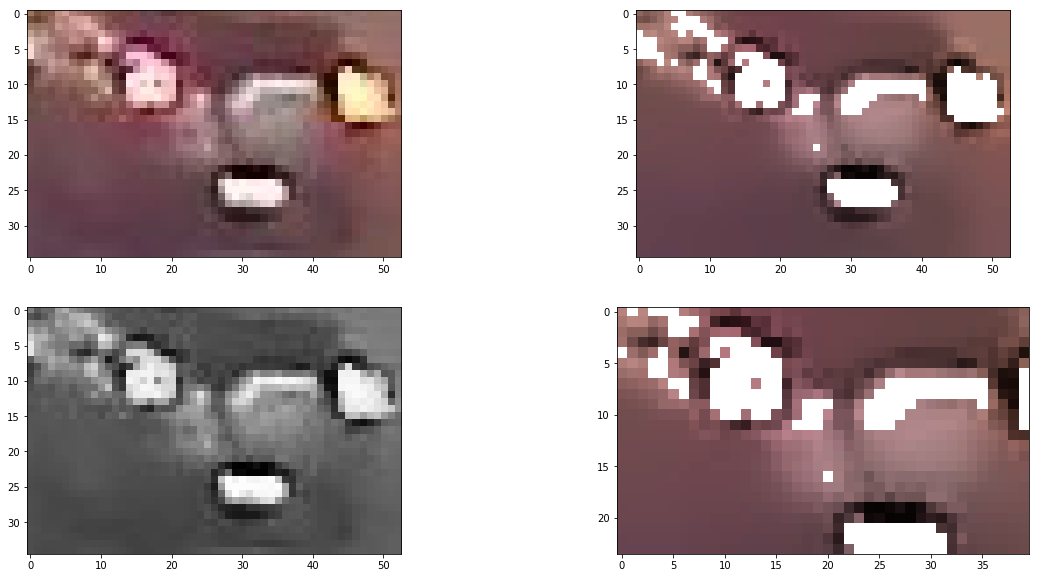

In [18]:
img = cv2.imread(img_path + target_folder + '10-2017-07-10-23-53-12-1499701992677-car-0.jpg')#
#img = cv2.imread('./whitebalanced.png')
#img2 = cv2.imread('./redlight6.jpg')
height,width,chann = img.shape


#print "red,    yellow,   blue,    green,    white,    black"
#print color_detection(img)


filtered_img= imgFilt(img)
#print color_detection(filtered_img)
grimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)



src_height, src_width, src_channels = img.shape
roiX = int(src_width / 10)
roiWidth = roiX * 8
roiY = int(src_height / 10)
roiHeight = roiY * 8

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
filtered_img = cv2.cvtColor(filtered_img,cv2.COLOR_BGR2RGB)

#dst = cv2.imread('./red2.jpg')
plt.figure(figsize=(20,10))
roiimg = img[roiY:roiY+roiHeight, roiX:roiX+roiWidth]
plt.subplot(221),plt.imshow(img)#
#plt.subplot(221),plt.imshow(img2)
plt.subplot(222),plt.imshow(filtered_img)
plt.subplot(223),plt.imshow(grimg ,cmap='gray')
#plt.subplot(223),plt.imshow(redmask)
img = filtered_img[roiY:roiY+roiHeight, roiX:roiX+roiWidth]
plt.subplot(224),plt.imshow(img)
plt.show()

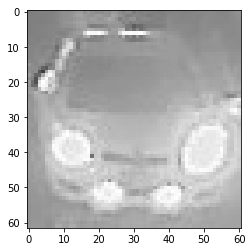

In [313]:
white_img = cv2.imread('white2.jpg')
gray_image = cv2.cvtColor(white_img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray_image)
backtorgb = cv2.cvtColor(gray_image,cv2.COLOR_GRAY2RGB)
plt.imshow(backtorgb)

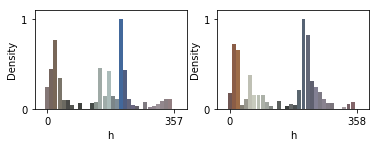

"\nhist2D = Hist2D(image, num_bins=32, color_space='hsv', channels=[0, 1])\nfig = plt.figure()\nax = fig.add_subplot(111)\nhist2D.plot(ax)\nplt.show()\n\n# 16 bins, rgb color space\nhist3D = Hist3D(image, num_bins=16, color_space='hsv')\n\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\nhist3D.plot(ax)\nplt.show()\n"

In [321]:
from color_histogram.io_util.image import loadRGB
from color_histogram.core.hist_1d import Hist1D
from color_histogram.core.hist_2d import Hist2D
from color_histogram.core.hist_3d import Hist3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

"""
for file in os.listdir(img_path + '../night_img/red'):
    if(file != os.path.basename("__file__")):
        if(file[-3:] == 'jpg'):
            # Load image.
            print(file)
            image = loadRGB(img_path + '../night_img/red/'+file)
            img = Image.open(img_path + '../night_img/red/' + file)
            # 16 bins, Lab color space, target channel L ('Lab'[0])
            hist1D = Hist1D(image, num_bins=32, color_space='hsv', channel=0)

            fig = plt.figure()
            ax = fig.add_subplot(111)
            hist1D.plot(ax)
            plt.show()
"""
image = loadRGB('b.jpg')
hist1D = Hist1D(image, num_bins=32, color_space='hsv', channel=0)

fig = plt.figure()
ax = fig.add_subplot(221)
hist1D.plot(ax)

image = loadRGB('b1.png')
hist1D = Hist1D(image, num_bins=32, color_space='hsv', channel=0)

ax = fig.add_subplot(222)
hist1D.plot(ax)
plt.show()
            
"""
hist2D = Hist2D(image, num_bins=32, color_space='hsv', channels=[0, 1])
fig = plt.figure()
ax = fig.add_subplot(111)
hist2D.plot(ax)
plt.show()

# 16 bins, rgb color space
hist3D = Hist3D(image, num_bins=16, color_space='hsv')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist3D.plot(ax)
plt.show()
"""

## Continuous color query: